# <font color = red> Natural Language Processing Project

In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

**We will use the [Yelp Review Data Set from Kaggle]** (https://www.kaggle.com/c/yelp-recsys-2013).

- Each observation in this dataset is a review of a particular business by a particular user.

- The **"stars"** column is the number of stars **(1 through 5)** assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

- The **"cool"** column is the number of "cool" votes this review received from other Yelp users. 

- All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

- The **"useful"** and **"funny"** columns are similar to the "cool" column.



### <font color = green> Importing the Required Libraries

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

### <font color = green> Importing the Data set

In [193]:
yelp = pd.read_csv("yelp.csv")

In [194]:
#Shape of the Dataset
yelp.shape

(10000, 10)

In [195]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [196]:
# Top 10 Rows

yelp.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [197]:
# Stats of the Columns

yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [198]:
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [199]:
# No of Unique Business Id
yelp["business_id"].nunique()

4174

In [200]:
# Counting the Length of the Text Review

len(yelp["text"].iloc[3])

419

**Create a new column called "text length" which is the number of words in the text column.**

In [201]:
yelp["text_length"] = yelp["text"].apply(len)

In [202]:
yelp.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1,2094
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0,274
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0,349
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186


### <font color = green> Exploratory Data Analysis

In [203]:
# histograms of text length based off of the star ratings
# Value counts of reviews on the basis of Stars

yelp["stars"].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [204]:
yelp[yelp["stars"]==5]["text_length"].mean()

624.9991009889122

<Figure size 864x576 with 0 Axes>

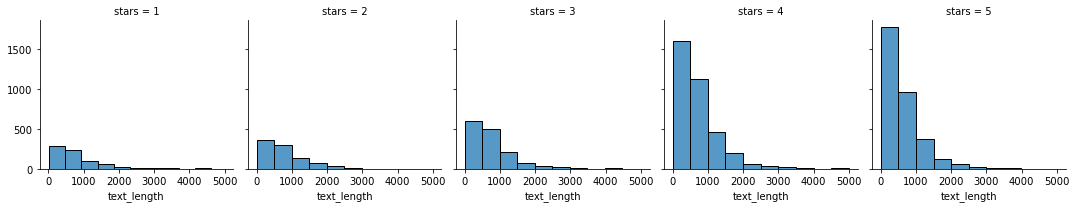

In [205]:
x = plt.figure(figsize=(12,8))
x = sns.FacetGrid(data=yelp, col="stars")
x.map(sns.histplot, "text_length", bins=10)

<font color = blue> <b> Mean Text length of the Review is higher for the Low reviews as compare to the 5 star review.

<AxesSubplot:xlabel='stars', ylabel='text_length'>

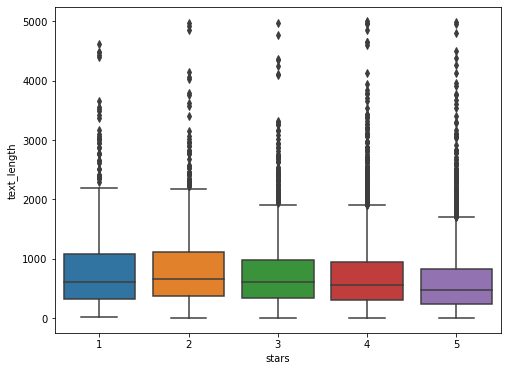

In [206]:
# boxplot of text length for each star category.
plt.figure(figsize=(8,6))
sns.boxplot(x="stars",y="text_length", data=yelp)

<AxesSubplot:xlabel='stars', ylabel='count'>

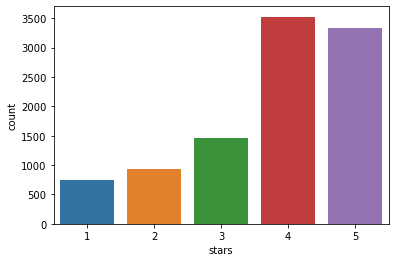

In [207]:
# Creating A count plot of  Stars
sns.countplot(x="stars", data=yelp)


In [208]:
# Groupby all the Numerical columns
yelp.groupby('stars')[['cool','useful','funny','text_length']].mean()

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [209]:
# Checking the correlation between all the numerical columns
yelp.groupby('stars')[['cool','useful','funny','text_length']].mean().corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

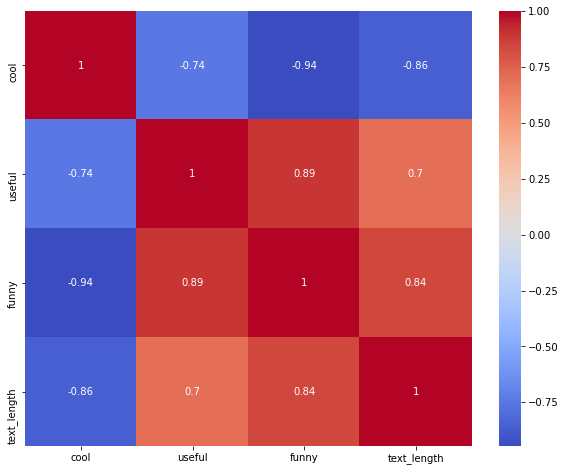

In [210]:
#Heatmap of the Correlation
plt.figure(figsize=(10,8))
sns.heatmap(yelp.groupby('stars')[['cool','useful','funny','text_length']].mean().corr(), cmap='coolwarm', annot=True)

### <font color = green> NLP Classification Task

To make things a little easier, we will only grab reviews that were either 1 star or 5 stars.

In [211]:
#Subsetting the Dataframe of 1 star and 2 star reviews

yelp_class = yelp[(yelp["stars"]==1) | (yelp["stars"]==5)]

In [212]:
yelp_class["stars"].value_counts()

5    3337
1     749
Name: stars, dtype: int64

In [213]:
# Dividing the Data set into Predictor and Target variable
X = yelp_class["text"]
y = yelp_class["stars"]

In [214]:
#Converting the Text into the tokens

In [215]:
CV = CountVectorizer()

In [216]:
X = CV.fit_transform(X)


In [217]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [218]:
#  Training the Multinomial NB moidel
NB = MultinomialNB()
NB.fit(X_train,y_train)

MultinomialNB()

In [219]:
# PRedicting on the Test Data Set
predict = NB.predict(X_test)

In [220]:
#predict

In [221]:
#Evaluating the Model

print("Confusion Matrix")
print(confusion_matrix(y_test, predict))
print("\n")
print("Clasiification Report")
print(classification_report(y_test, predict))

Confusion Matrix
[[159  69]
 [ 22 976]]


Clasiification Report
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [222]:
# Creating a Pipeline for the Above Model

pipeline_MB = Pipeline([
                    ("CV", CountVectorizer()),       # String the token integer count
                    ("MB", MultinomialNB())   # Multinomial NB classifier
])

#Train Test Split
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)




#Training and Predicting 
pipeline_MB.fit(X_train,y_train)
predict_MB = pipeline_MB.predict(X_test)

#Evaluating the Result
print("Confusion Matrix")
print(confusion_matrix(y_test, predict_MB))
print("\nb")
print("Clasiification Report")
print(classification_report(y_test, predict_MB))

Confusion Matrix
[[155  73]
 [ 15 983]]


Clasiification Report
              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226



In [224]:
len(predict_MB)

1226

In [174]:
# Saving the Test Data in the CSV file
X_test.to_csv('test.csv')

In [186]:
len(X_test)

1226

In [187]:
X_test

2414    Japanese chefs, top notch sashimi, affordable ...
3552    The staff of this "establishment" are some of ...
5364    I love Jimmy Johns.  It is WAY better than Sub...
1222    Honestly, this is the best pizza that I've had...
5011                   Poor service-small portions-pricey
                              ...                        
5627    20% off with a Yelp check in? SCORE! \n\nThey ...
862     An oasis of little kid fun in Phoenix, we hadn...
5307    If I could give it more than 5, I would.  Swee...
9420    This is a brand new delicatessen who's grand o...
1455    I've been going to Lake Pleasant Dentistry for...
Name: text, Length: 1226, dtype: object

In [190]:
X_test[5627]

"20% off with a Yelp check in? SCORE! \n\nThey have very unique, colorful and patterned vintage clothing for sale. But what I liked most about this store is their vintage jewelry! There's a local jeweler who makes rings out of old school buttons and brooches. I snatched up two really cute vintage rings."

In [191]:
y_test[5627]

5

In [163]:
# Creating A Pickle File

import pickle

pickle.dump(pipeline_MB, open('MNB_classifier.pkl', 'wb'))

In [229]:
import numpy as np

In [234]:
np.array(X_test).reshape(-1,1).shape

(1226, 1)

In [164]:
# Loading the model through Pickle File

pickl_pipeline = pickle.load(open('MNB_classifier.pkl', 'rb'))

In [165]:
# Predicting through Pickle pipeline

pickl_predict = pickl_pipeline.predict(X_test)


#Evaluating the Result of Pickle Model
print("Confusion Matrix")
print(confusion_matrix(y_test, pickl_predict))
print("\n")
print("Clasiification Report")
print(classification_report(y_test, pickl_predict))

Confusion Matrix
[[155  73]
 [ 15 983]]


Clasiification Report
              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226



In [248]:
# Creating a Data Frame of the Predicted and Actual Result

Result_df = pd.DataFrame(data = [pickl_predict,y_test])

In [253]:
Result_df = Result_df.T


In [263]:
Result_df.rename(columns={0:"Predicted", 1:"Actual"}, inplace=True)

In [281]:
Result_df.head(15)

,Predicted,Actual
0,5,5
1,1,1
2,5,5
3,5,5
4,5,1
5,5,5
6,5,5
7,5,5
8,5,5
9,5,5
